# Prerequisites and Setup:

In [1]:
import qiskit, matplotlib.pyplot as plt
from qiskit import *

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

qiskit.__qiskit_version__

{'qiskit': '0.45.1', 'qiskit-aer': '0.13.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': '0.7.1', 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': '0.7.1'}

# Our First Quantumcircuit:

In [2]:
circuit = QuantumCircuit(2, 2) # args = (qubits, bits), so 2 qubits and 2 (classical) bits
circuit.draw() # returns an 'empty' circuit w/o any operations

q_0: 
     
q_1: 
     
c: 2/

An entanglement operation can be incorporated by means of introduing a *Hadamard Gate* $H$ and a *CNOT Gate* $\sigma_{X}$:

In [3]:
circuit.h(0) # Hadamard gate on qubit 0
circuit.cx(0, 1) # CNOT gate on (control) qubit 0 and (target) qubit 1

circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

# Alternate rendering styles for Quantumcircuits:

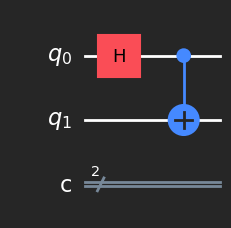

In [4]:
circuit.draw(output = 'mpl', style = 'iqx-dark') # Preferred style for me :)

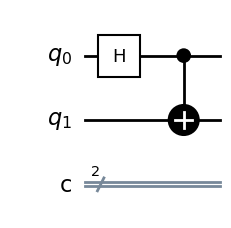

In [5]:
circuit.draw('mpl', style = 'bw')

# Measurement Operation:

The ``measure`` function is used to store the statevector(s) and probabilities of the qubits in the classical register.

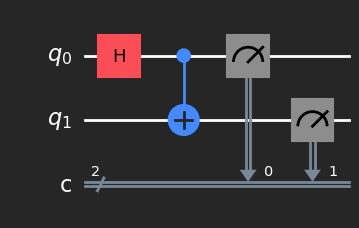

In [6]:
circuit.measure([0, 1], [0, 1]) # measure qubit 0 and 1 and store the result in bit 0 and 1
circuit.draw(output = 'mpl', style = 'iqx-dark')

# Simulator and Results (QASM):

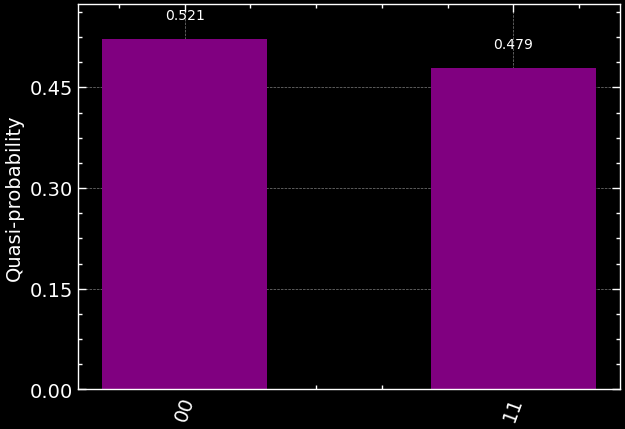

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()

from qiskit.tools.visualization import plot_distribution
plot_distribution(result.get_counts(circuit), color = 'purple')

As evident, the probabilities of both states are (very) roughly equivalent. The discrepancy arises from the fact that we've only considered 2 quantumstates, whereas the actual statevector is a superposition of all possible states. Let's try the same wth IBM's quantumdevices:

In [8]:
#IBMQ.save_account('<YOUR API TOKEN>') 

provider = IBMQ.load_account() # Load account from disk

C:\Users\DELL\AppData\Local\Temp\ipykernel_14596\88857584.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account() # Load your account


In [9]:
qcomp = provider.get_backend('ibmq_qasm_simulator') # Get the backend (quantum computer) from the provider
job = execute(circuit, backend = qcomp) # Execute the circuit on the backend
 
from qiskit.tools.monitor import job_monitor
job_monitor(job) 

Job Status: job has successfully run


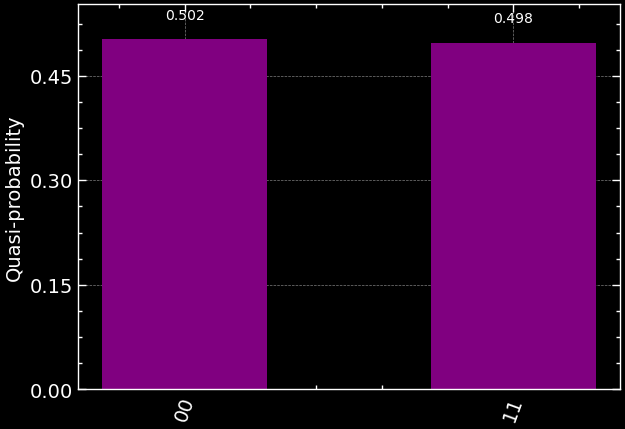

In [10]:
result = job.result()
plot_distribution(result.get_counts(circuit), color = 'purple')